# Project 2 - Data visualization
###  Creating subplots to show variations by site
by: Alissa Stover, Sophia Skowronski, Ying Hua

This Jupyter notebook walks through some data visualization steps for data from a Kaggle competition. 
The data and the complete data dictionary are here: https://www.kaggle.com/c/ashrae-energy-prediction/data 

## Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import itertools
from scipy.stats import chi2_contingency

## Load Data

In [2]:
train_tz_df = pd.read_pickle('tz_aware_merged_data_weather_imputed.pkl')

## Correlation Matrix

In [3]:
# select columns
train_tz_thin = train_tz_df.drop(columns=['building_id', 'site_id', 'index', 'std', 'dst', 'meter', 'outlier', 'avg', 'time_index', 'day_of_week', 'hour_of_day'])



Text(0.5, 1, 'Correlations between target and quantitative predictor variables')

<Figure size 432x288 with 0 Axes>

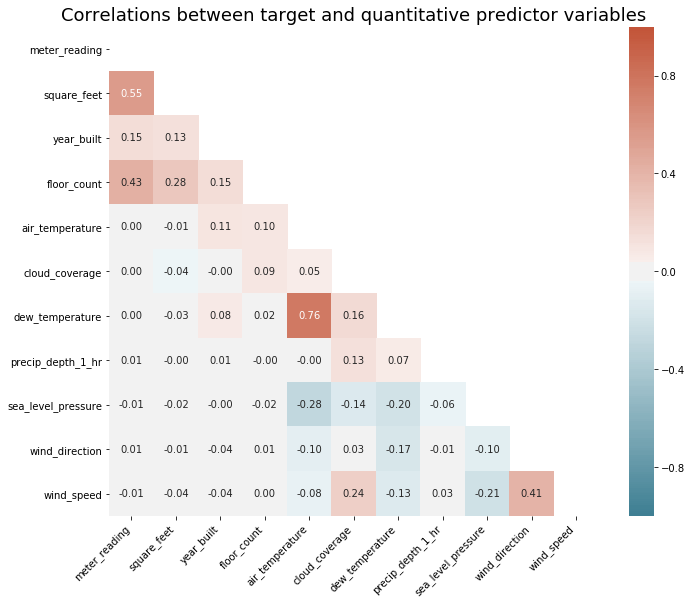

In [4]:
# calculate correlations
corr = train_tz_thin.corr()

# create mask so we can limit matrix to lower triangle 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# create figure and subplots
fig = plt.figure()
fig, ax = plt.subplots(figsize=(11, 9))

# create heatmap for correlation matrix
ax = sns.heatmap(
    corr, 
    mask = mask, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(220, 20, n = 200),
    square = True,
    annot = True, 
    fmt=".2f"
)

# set labels 
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

ax.set_title('Correlations between target and quantitative predictor variables', size = 18)



In [5]:
# save figure
fig.savefig('corr_matrix.jpg', bbox_inches = 'tight')

## Matrix for Cramers stat

In [6]:
# create function to calculate Cramers
'''Correlation with categorical variables'''
def cramers_corrected_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [7]:
# apply function to data
cols = ['meter_reading', 'site_id',
       'primary_use', 
       'day_of_week', 'hour_of_day', 
       'timezone', 'country_code', 'location']
corrM = np.zeros((len(cols),len(cols)))
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(train_tz_df[col1], train_tz_df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

Text(0.5, 1, 'Relationships between target and categorical predictor variables')

<Figure size 432x288 with 0 Axes>

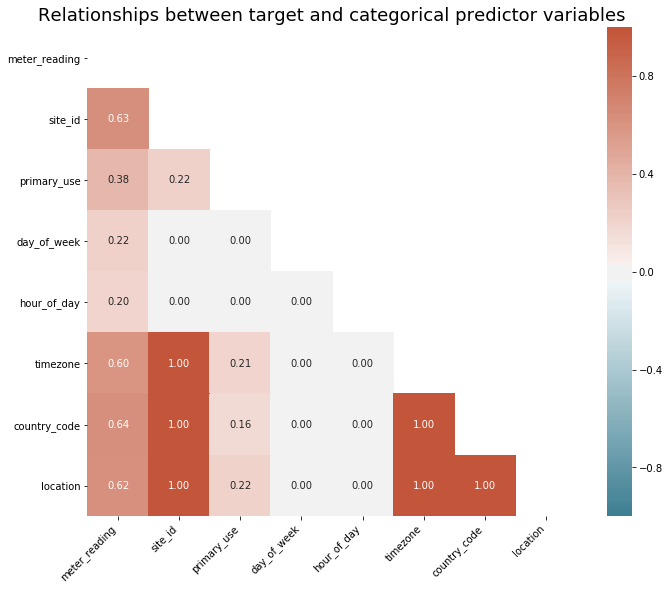

In [8]:
# calculate stats
corr = pd.DataFrame(corrM, index=cols, columns=cols)

# create mask so we can limit matrix to lower triangle 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# create figure and subplots
fig = plt.figure()
fig, ax = plt.subplots(figsize=(11, 9))

# create heatmap for correlation matrix
ax = sns.heatmap(
    corr, 
    mask = mask, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(220, 20, n = 200),
    square = True,
    annot = True, 
    fmt=".2f"
)

# set labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

ax.set_title('Relationships between target and categorical predictor variables', size = 18)



In [9]:
# save figure
fig.savefig('chi2_matrix.jpg', bbox_inches = 'tight')

## Correlation Matrix for one primary use (Offices)

In [10]:
# select data
train_office_df = train_tz_thin[train_tz_thin['primary_use'] == 'Office']

Text(0.5, 1, 'Relationships between target and predictor variables for buildings primarily used as offices')

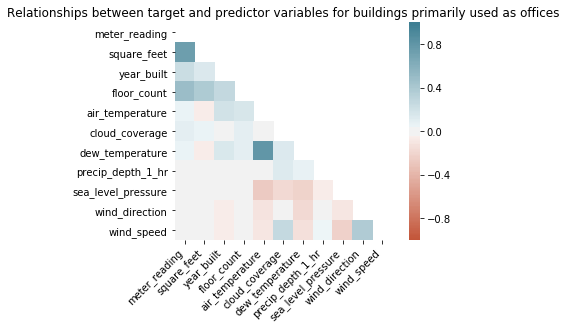

In [11]:
# calculate correlations
corr = train_office_df.corr()

# create mask so we can limit matrix to lower triangle 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# create figure
fig = plt.figure()

# create heatmap for correlation matrix
ax = sns.heatmap(
    corr, 
    mask = mask, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# set labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title('Relationships between target and predictor variables for buildings primarily used as offices')

